**Option 2:**

Author: Olivia Holt

github: https://github.com/olleholt/Maricopa-BII

### Biodiversity Intactness Index change in Phoenix subdivision

#### Context

In 2021, Maricopa County, which encompasses the Phoenix metropolitan area, was the US county that added the most developed land since 2001 [1]. Urban sprawl creates pressure on biodiversity and natural areas. In this task you will explore a dataset showing values for a biodiversity intactness index (BII) [2, 3] to find changes in this BII around the Phoenix area from 2017 to 2020.

### Highlights of analysis:
 - Data wrangling and exploration
 - Geospatial data wrangling
 - Creating and customizing a map

### Data
Data access:
BII data: This dataset is part of the MPC STAC catalog. The ‘io-biodiversity’ collection and look for the 2017 and 2020 rasters covering Phoenix subdivision.

#### references:
The Phoenix subdivision polygon in the Census County Subdivision shapefiles for Arizona: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions


## Import Libraries
import necessary libraries.

In [1]:
import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from shapely.geometry import Polygon

# used to access STAC catalogs
from pystac_client import Client
# used to sign items from the MPC STAC catalog
import planetary_computer

# ----- other libraries for nice ouputs
from IPython.display import Image
import contextily as ctx #basemaps


## Accessing the Data
Loading the catalog from the planetary computer and the arizona shapefile.

In [2]:
# access catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

AZ_shp = gpd.read_file("data/tl_2022_04_cousub")

# metadata from the catalog
#print('ID:', catalog.id)
print('Title:', catalog.title)
print('Description:', catalog.description)

#access the collections with get_collections():
catalog.get_collections()

Title: Microsoft Planetary Computer STAC API
Description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


<generator object Client.get_collections at 0x7c0dec784260>

In [3]:
# get collections and print their names
collections = list(catalog.get_collections())

print('Number of collections:', len(collections))

Number of collections: 122


In [4]:
io_bio_collection = catalog.get_child('io-biodiversity')
#io_bio_collection

In [5]:
# Temporal range of interest
time_range= "2017-01-01/2020-12-31"

# NCEAS bounding box (as a GeoJSON)
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# catalog search
search = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_range) #datetime = 2017/2020
search

In [6]:
items = search.item_collection()
items

# number of items in search
len(items)

items

id: bii_2020_34.74464974521749_-115.38597824385106_cog
"bbox: [-115.3859782, 27.565314, -108.2066425, 34.7446497]"
datetime: None
proj:epsg: 4326
"proj:shape: [7992, 7992]"
end_datetime: 2020-12-31T23:59:59Z
"proj:transform: [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0]"
start_datetime: 2020-01-01T00:00:00Z
https://stac-extensions.github.io/projection/v1.0.0/schema.json
https://stac-extensions.github.io/raster/v1.1.0/schema.json
https://stac-extensions.github.io/version/v1.1.0/schema.json


In [7]:
# get first item in the catalog search
item_2017 = items[3]
type(item_2017)

# print item id and properties
print('id:' , item_2017.id)
item_2017.properties

item_2017.assets

for key in item_2017.assets.keys():
    print(key, '--', item_2017.assets[key].title)
    
# plot rendered preview
#Image(url=item_2017.assets['rendered_preview'].href, width=500)

id: bii_2017_34.74464974521749_-115.38597824385106_cog
data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [8]:
## -------------------------------------------------------------------------#
# get fourth item in the catalog search
item_2020 = items[0]
type(item_2020)


# print item id and properties
print('id:' , item_2020.id)
item_2020.properties

item_2020.assets

for key in item_2020.assets.keys():
    print(key, '--', item_2020.assets[key].title)
    
# plot rendered preview
#Image(url=item_2020.assets['rendered_preview'].href, width=500)

id: bii_2020_34.74464974521749_-115.38597824385106_cog
data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [9]:
AZ_2017 = rioxr.open_rasterio(item_2017.assets['data'].href)
AZ_2017

AZ_2020 = rioxr.open_rasterio(item_2020.assets['data'].href)
AZ_2020

<xarray.DataArray (band: 1, y: 7992, x: 7992)>
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

## Creating a map of Phoenix subdivision in Arizona.
Creating a map showing the Phoenix subdivision within Arizona to visualize the area of interest.

In [10]:
#clip to arizone shapefile
#AZ_shp.plot()

AZ_shp.NAME.values

array(['Flagstaff', 'Kaibab Plateau', 'Hualapai', 'Nogales', 'Patagonia',
       'Hopi', 'Tuba City', 'Clifton', 'Duncan', 'Chandler', 'Phoenix',
       'Tonto National Forest', 'Gila Bend', 'Wickenburg', 'Deer Valley',
       'Buckeye', 'St. Johns', 'Salt River', 'Tucson', 'Arivaca',
       'Indian Wells', 'Winslow-Holbrook', 'Snowflake', 'Kayenta',
       'Lake Havasu City', 'Fort Apache', 'Bisbee', 'Bowie', 'Willcox',
       'North Mohave', 'Kingman', 'Bullhead City', 'Congress',
       'Mingus Mountain', 'Florence', 'North Pinal', 'San Manuel', 'Eloy',
       'Chinle', 'Fort Apache', 'Sweetwater', 'Fort Defiance',
       'Dennehotso', 'Puerco', 'Ash Fork', 'Cordes Lakes-Mayer',
       'Camp Verde-Sedona', 'Prescott', 'Hopi', 'Piñon', 'Fort Apache',
       'Payson', 'Winkelman', 'Globe-Miami', 'Tonto Basin', 'Gila River',
       'Casa Grande', 'Maricopa-Stanfield', "Tohono O'odham Nation",
       'Coolidge', 'Ajo', 'Marana', "Tohono O'odham Nation", 'Somerton',
       'Bonita-Klondy

In [11]:
phx = AZ_shp[AZ_shp.NAME == "Phoenix"]

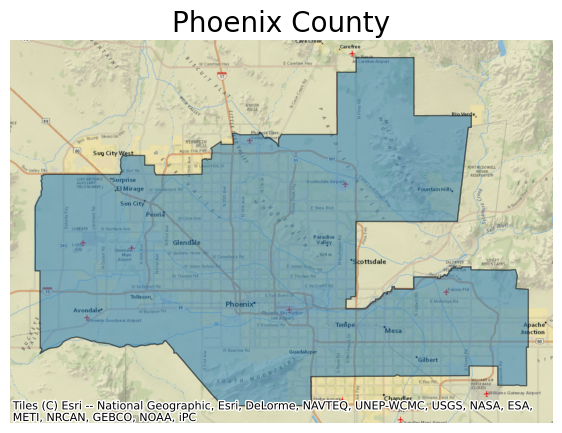

In [12]:
ax = (phx.to_crs(epsg=3857)
      .plot(figsize=(7,7),alpha=0.5, edgecolor="k")
     )
ctx.add_basemap(ax, source = ctx.providers.Esri.NatGeoWorldMap)
    
ax.set_title("Phoenix County", fontdict = {"fontsize":"20"})
ax.set_axis_off()

## Calculations
Calculating the percentage of area of the Phoenix subdivision with a BII of at least 0.75 in 2017 and 2020.

In [13]:
phx.crs = "epsg:4326"

phx.crs == AZ_2017.rio.crs

phx.head

clip_2017 = (AZ_2017.rio.clip(phx.geometry))
clip_2020 = (AZ_2020.rio.clip(phx.geometry))

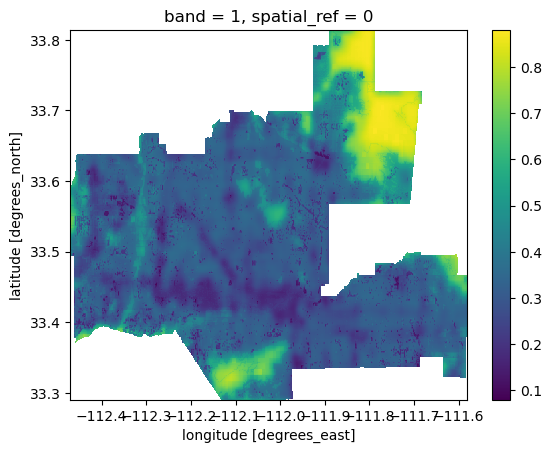

In [14]:
clip_2020.plot()

In [15]:
greaterBII_2017 = (clip_2017 >= 0.75)

greaterBII_2020 = (clip_2020 >= 0.75)

greaterBII_2017_int = greaterBII_2017.astype(int)

greaterBII_2020_int = greaterBII_2020.astype(int)

#area percentages
p_area_2017 = (greaterBII_2017_int.sum() / clip_2017.count())*100

p_area_2017

p_area_2020 = (greaterBII_2020_int.sum() / clip_2020.count())*100

print(p_area_2017)
print(p_area_2020)


<xarray.DataArray ()>
array(7.12518453)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(6.49129023)
Coordinates:
    spatial_ref  int64 0


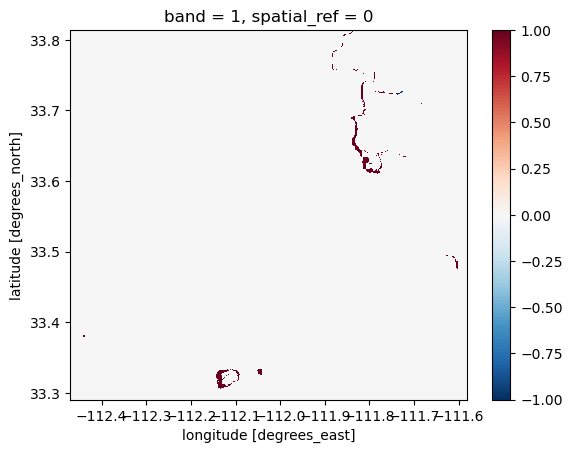

In [16]:
change_p_area = greaterBII_2017_int - greaterBII_2020_int
type(change_p_area)

change_p_area.plot()

## Final Visualization
Creating a visualization showing the area with BII>=0.75 in 2017 that was lost by 2020.

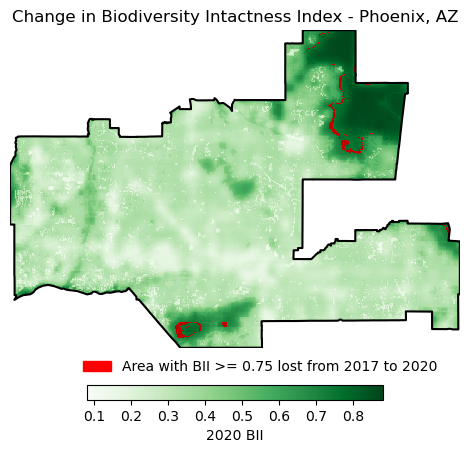

In [17]:
#change_p_area = greaterBII_2017_int - greaterBII_2020_int

new_vis = change_p_area.squeeze().drop('band')

type(change_p_area)
new_vis1 = new_vis.where(new_vis == 1, np.nan)

#plot
fig, ax = plt.subplots()

image_1 = clip_2020.plot(ax=ax, cmap='Greens', add_colorbar=False)
colorbar1 = plt.colorbar(image_1, ax=ax, orientation = 'horizontal',fraction=0.04,pad=0.1, ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
colorbar1.set_label('2020 BII')


colorbar1.ax.yaxis.label.set_rotation(270)


image_2 = new_vis1.plot(ax=ax, cmap="gist_heat",add_colorbar=False)
patches = mpatches.Patch(color="red",label = "Area with BII >= 0.75 lost from 2017 to 2020")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = [patches], frameon=False, loc=(0.15,-0.1))

ax.axis('off')
ax.set_title('Change in Biodiversity Intactness Index - Phoenix, AZ')

# Plot the shapefile underneath for the outline of the file
phx.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

plt.show()